# _King County House Price Prediction_

_Bu projede AB Washington Eyaleti King ilçesi için ev fiyatlarını tahmin eden bir regression modeli geliştireceğiz._ <br>
_Hedefimiz R2 > 0.80 ve RMSE < $100K_

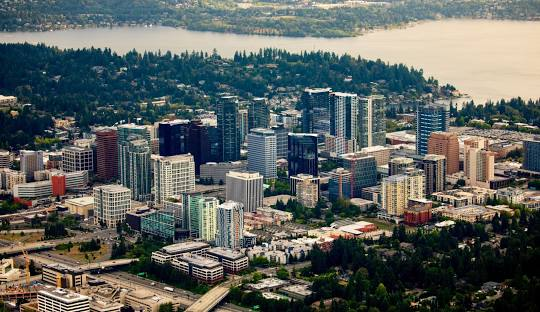

#### _Data Dictionary_

#### _İmport_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

#### _Data Dosyası Okuma_

In [2]:
df=pd.read_csv('kc_house_data.csv')

# 'kc_house_data.csv' dosyasını okur ve DataFrame (df) olarak yükler.

In [3]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is CC41-92F9

 Directory of C:\Users\13tua\OneDrive\Belgeler\Yapay-Zeka-Kursu\Day3

07.11.2025  22:40    <DIR>          .
24.10.2025  20:09    <DIR>          ..
07.11.2025  20:16    <DIR>          .ipynb_checkpoints
17.10.2025  00:20            69.632 cars.db
17.10.2025  00:19           141.824 cars.xls
17.10.2025  00:20           732.191 combine.csv
24.10.2025  20:06            42.006 EvFiyatlar�Tahmini.ipynb
17.10.2025  00:20             5.533 heightweight.csv
07.11.2025  22:40           963.174 HousePricePredictionRegression(day_3).ipynb
17.10.2025  00:21         2.515.206 kc_house_data.csv
17.10.2025  00:20               312 PastHires.csv
06.11.2025  01:48         6.578.445 Regression(day_3).ipynb
17.10.2025  00:21         1.529.169 sales.csv
              10 File(s)     12.577.492 bytes
               3 Dir(s)  107.187.474.432 bytes free


In [4]:
# ls = Bulunduğunuz çalışma klasöründeki dosya ve klasörleri listelemeye yarar.

In [5]:
pwd # Çalıştığınız mevcut çalışma dizinini (path) gösterir.

'C:\\Users\\13tua\\OneDrive\\Belgeler\\Yapay-Zeka-Kursu\\Day3'

#### _EDA - Exploratory Data Analysis - Keşifçil Veri Analizi_

In [6]:
df.head() # ilk 5 satır

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.tail() # son 5 satır

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
df.describe() # istatistiksel bilgiler

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info() # genel bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df.isnull().sum()  # hangi sutunda kaç bos veri var

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.corr(numeric_only=True) # sayısal sütunlar arasında korelasyon

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [12]:
df.shape # satır ve sütun sayısı

(21613, 21)

#### _Veri Görselleştirme / Outliers_

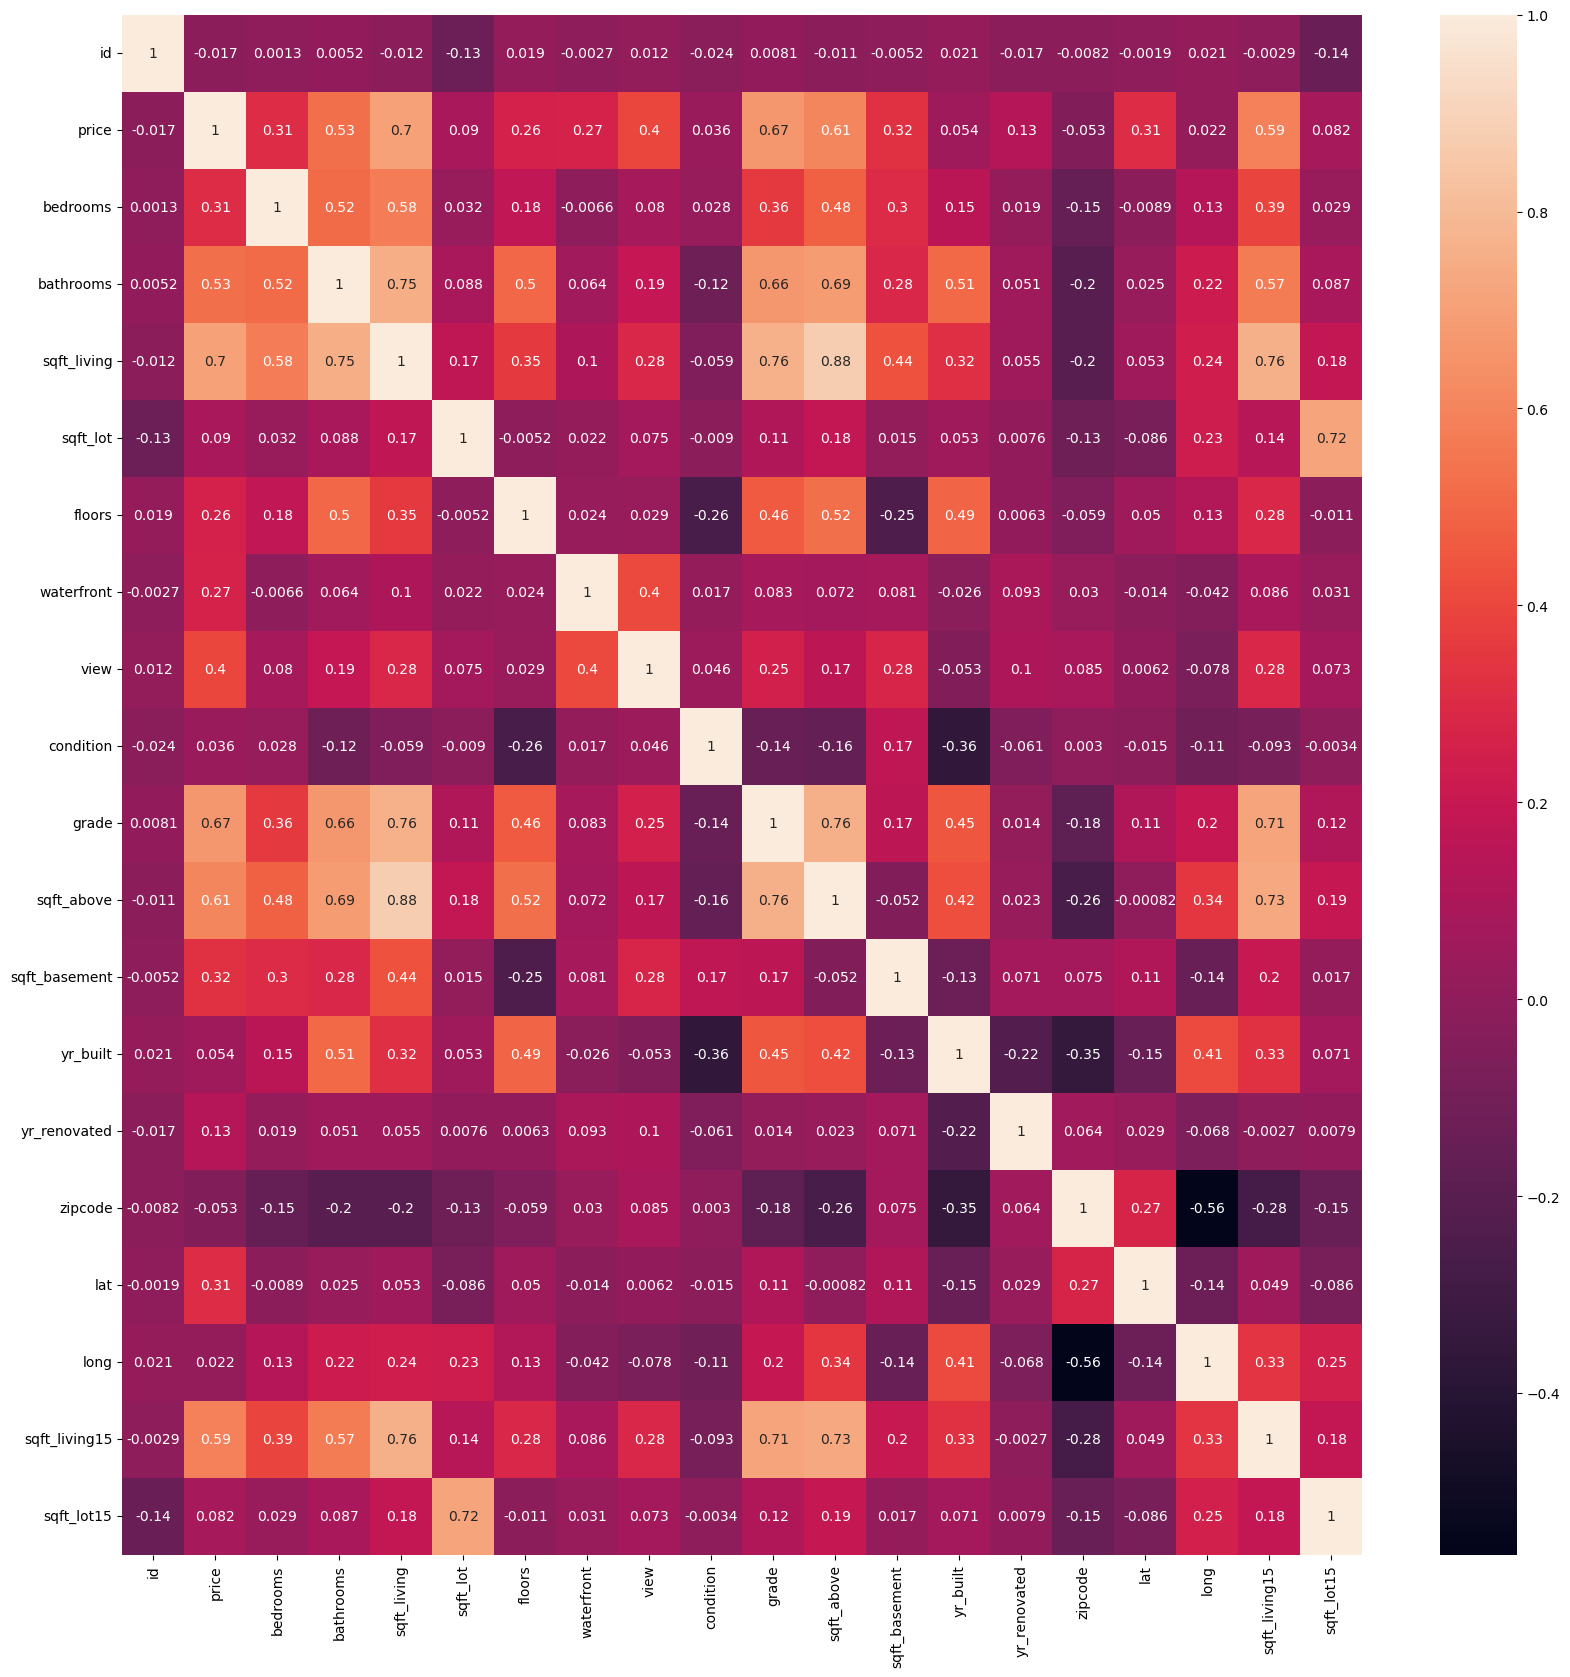

In [13]:
plt.figure(figsize=(20, 20))  

# Grafik boyutlarını ayarlamak için kullanılır. Burada 20x20 inçlik bir boyut belirlenmiş.

sns.heatmap(df.corr(numeric_only=True), annot=True); 
 
# Veri setindeki sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştirir.
# annot=True parametresi, her hücreye korelasyon değerini yazdırır.

In [14]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))  

# 'price' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır.
# abs() fonksiyonu, negatif korelasyonları pozitif hale getirir (mutlak değeri alır).
# sort_values(ascending=False) ise korelasyonları büyükten küçüğe doğru sıralar. True yazsaydık küçükten büyüğe sıralardı.
# Bu, 'price' sütunu ile en yüksek korelasyona sahip olan diğer sütunları görmeyi sağlar.

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

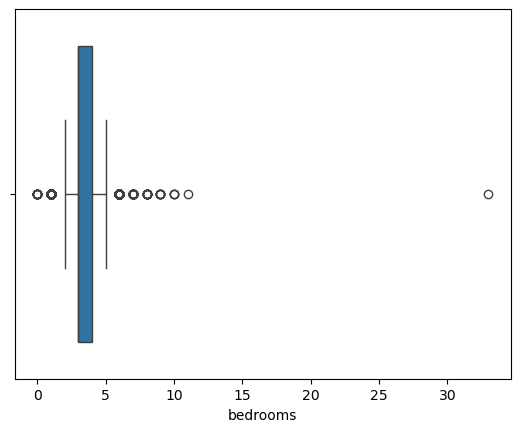

In [15]:
sns.boxplot(x=df['bedrooms']);  

# 'bedrooms' sütunu için bir kutu grafiği (boxplot) çizer.
# Kutu grafiği, verinin dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

In [16]:
df['bedrooms'].mean() + 3 * df['bedrooms'].std()  

# 'bedrooms' sütununun ortalamasına, 3 katı standart sapma ekler.
# Bu, "3-sigma kuralı" olarak bilinir ve genellikle aykırı değerleri belirlemek için kullanılır.
# Verinin normal dağıldığı varsayımıyla, bu değer ortalamanın 3 standart sapma üstündeki noktayı temsil eder.

np.float64(6.1610271165396)

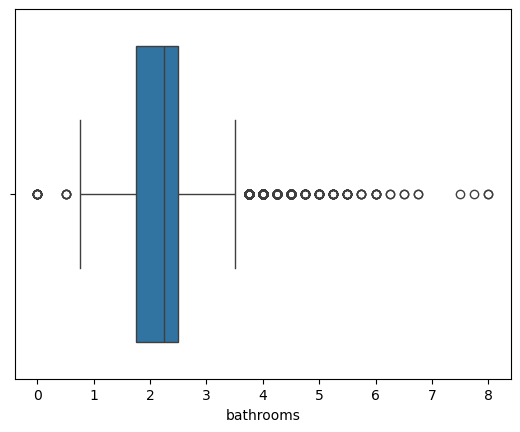

In [17]:
sns.boxplot(x=df['bathrooms']); 
 
# 'bathrooms' sütunu için bir kutu grafiği (boxplot) çizer.
# Bu grafik, 'bathrooms' verisinin dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

In [18]:
df[df['bedrooms'] > 30] 
 
# 'bedrooms' sütunundaki değeri 30'dan büyük olan satırları filtreler ve döker.
# Bu, yatak odası sayısı 30'dan fazla olan konutları bulmak için kullanılır.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


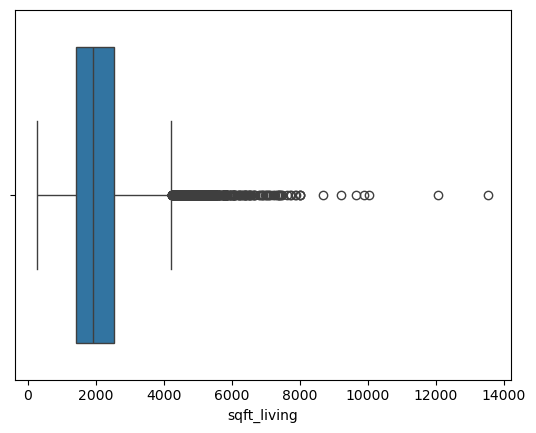

In [19]:
sns.boxplot(x=df['sqft_living']);  

# 'sqft_living' (yaşam alanı) sütunu için bir kutu grafiği (boxplot) çizer.
# Bu grafik, yaşam alanının (metrekare) dağılımını, medyanını, çeyrek değerlerini ve aykırı değerleri görselleştirir.

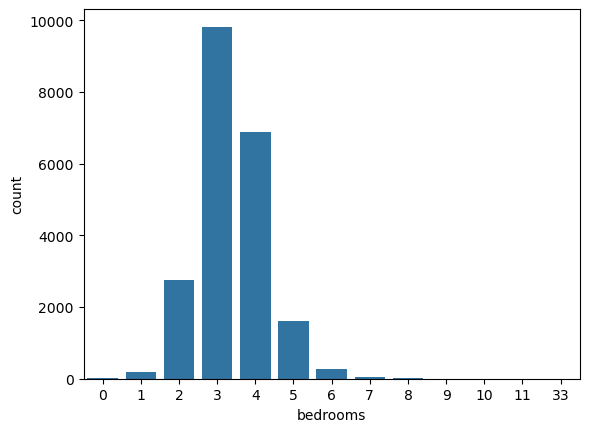

In [20]:
sns.countplot(x=df['bedrooms']);  

# 'bedrooms' (yatak odası sayısı) sütunundaki her bir farklı değerin frekansını (sayısını) çizer.
# Bu grafik, her bir yatak odası sayısının kaç kez tekrar ettiğini gösterir.
# Sayısal olmayan (kategorik) verilerin dağılımını görselleştirmek için kullanılır

In [21]:
outliers = df.quantile(q=.97, numeric_only=True)  

# Veri çerçevesindeki sayısal sütunlar için, her birinin 0.97 (yüzde 97) çeyrek değerini hesaplar.
# Bu, verinin en yüksek %3'ünü temsil eder ve potansiyel aykırı (outlier) değerlerin tespiti için kullanılabilir.

In [22]:
df = df[(df['price'] < outliers['price'])]  
# 'price' (fiyat) sütunundaki aykırı değerleri çıkarır.
# Verinin fiyatı, belirlediğiniz %97 çeyrek değerinden büyükse, o satırları filtreler ve çıkarır.

df = df[(df['bedrooms'] < outliers['bedrooms'])]  
# 'bedrooms' (yatak odası sayısı) sütunundaki aykırı değerleri çıkarır.
# Yatak odası sayısı, belirlediğiniz %97 çeyrek değerinden büyükse, o satırları filtreler ve çıkarır.

df = df[(df['bathrooms'] < outliers['bathrooms'])]  
# 'bathrooms' (banyo sayısı) sütunundaki aykırı değerleri çıkarır.
# Banyo sayısı, belirlediğiniz %97 çeyrek değerinden büyükse, o satırları filtreler ve çıkarır.

df = df[(df['sqft_living'] < outliers['sqft_living'])]  
# 'sqft_living' (yaşam alanı) sütunundaki aykırı değerleri çıkarır.
# Yaşam alanı, belirlediğiniz %97 çeyrek değerinden büyükse, o satırları filtreler ve çıkarır.

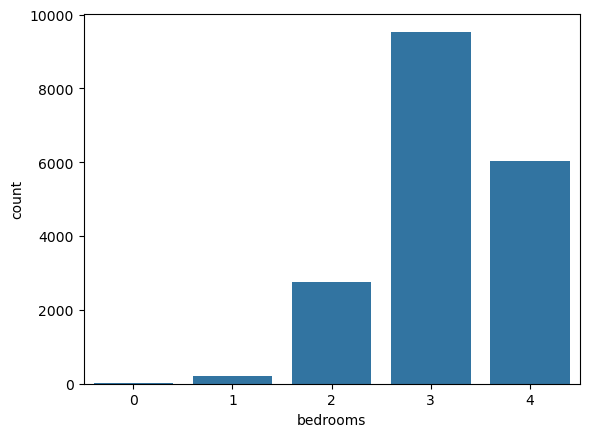

In [23]:
sns.countplot(x=df['bedrooms']);  

# 'bedrooms' (yatak odası sayısı) sütunundaki her bir benzersiz değerin (farklı yatak odası sayılarının) frekansını çizer.
# Yani, her yatak odası sayısının kaç tane evde bulunduğunu görselleştirir.
# Bu grafik, kategorik verinin dağılımını incelemek için kullanılır.

#### _Feature Engineering_

In [24]:
df.shape  

# DataFrame'in boyutlarını döndürür.  
# (satır sayısı, sütun sayısı) şeklinde çıktı verir.

(18519, 21)

In [25]:
df['zipcode'] = df['zipcode'].astype('object')  

# 'zipcode' sütununun veri tipini object (kategorik veri) türüne çevirir.  
# Çünkü posta kodu sayısal görünse de matematiksel işlem yapılmaz, kategorik değişkendir.

In [26]:
df['bedrooms']=df['bedrooms']**2

# 'bedrooms' sütunundaki her değerin karesini alır.  
# Modelde doğrusal olmayan (non-linear) etkileri yakalamak için yapılabilir.

df['bathrooms']=df['bathrooms']**2

# 'bathrooms' sütunundaki her değerin karesini alır.

df['sqft_living']=df['sqft_living']**2

# 'sqft_living' sütunundaki her değerin karesini alır.

In [27]:
df.head()

# Veri çerçevesinin ilk 5 satırını gösterir, yapılan değişiklikleri kontrol etmek için kullanılır.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
import datetime

# Tarih ve zaman işlemleri yapmak için kullanılan kütüphane.

In [29]:
datetime.datetime.now().year

# Şu anki yılı döndürür. (örneğin: 2025)

2025

In [30]:
df['age']=datetime.datetime.now().year-df['yr_built']

# Evin yaşını hesaplar: mevcut yıldan inşa yılını çıkarır.

In [31]:
2001/2002

# Bu sadece örnek bir işlem (yaklaşık 0.995 sonucu verir).  
# İstatistiksel veya mantıksal anlamı yok, örnek/test amaçlı olabilir.

0.9995004995004995

In [32]:
# correlation does not mean causation  
# (Korelasyon nedensellik anlamına gelmez.)  
# İki değişkenin ilişkili olması, birinin diğerine neden olduğu anlamına gelmez.

In [33]:
df['yr_renovated']=np.where(df['yr_renovated']>0,1,0) 

# 'yr_renovated' sütununda 0'dan büyük değer varsa 1 (tadilat yapılmış),  
# aksi halde 0 (tadilat yapılmamış) olarak dönüştürür.

df['sqft_living']=np.where(df['sqft_living']>0,1,0) 

# 'sqft_living' sütununda 0'dan büyük değer varsa 1 (bodrum veya yaşam alanı var),  
# değilse 0 (yok) olarak işaretler.

In [34]:
x=df.drop(['id','date','lat','price'], axis=1) 

# Modelde kullanılmayacak sütunları veri setinden çıkarır.  
# 'axis=1' sütun silmek için kullanılır (axis=0 satır siler).

y=df[['price']]

# Hedef değişken (bağımlı değişken) olarak 'price' sütununu belirler.

#### _Modelling_

In [35]:
df.columns

# DataFrame içindeki tüm sütun isimlerini listeler.

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [36]:
x=pd.get_dummies(x,drop_first=True)

# Kategorik değişkenleri (örneğin 'zipcode') one-hot encoding yöntemiyle sayısal değerlere dönüştürür.  
# drop_first=True, çoklu doğrusal bağımlılığı (dummy trap) önlemek için ilk kategoriyi kaldırır.

In [37]:
x.head()

# Dönüştürülmüş veri setinin ilk 5 satırını gösterir.  
# Encoding işleminin doğru uygulanıp uygulanmadığını kontrol etmek için kullanılır.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,long,sqft_living15,sqft_lot15,age,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1,5650,1.0,0,0,3,7,1180,0,1955,0,-122.257,1340,5650,70,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,1,7242,2.0,0,0,3,7,2170,400,1951,1,-122.319,1690,7639,74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,1,10000,1.0,0,0,3,6,770,0,1933,0,-122.233,2720,8062,92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,1,5000,1.0,0,0,5,7,1050,910,1965,0,-122.393,1360,5000,60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,1,8080,1.0,0,0,3,8,1680,0,1987,0,-122.045,1800,7503,38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

# Veriyi eğitim (%80) ve test (%20) olarak ikiye ayırır.  
# random_state=42 sabit tutulursa her çalıştırmada aynı sonuç elde edilir.

In [39]:
lr=LinearRegression()

# Doğrusal regresyon (Linear Regression) modelini tanımlar.

In [40]:
lr.fit(x_train,y_train)

# Modeli, eğitim verisi (x_train ve y_train) ile eğitir.

LinearRegression()

In [41]:
tahmin=lr.predict(x_test)

# Eğitilmiş modeli kullanarak test verisi üzerinde tahmin yapar.

In [42]:


# Modelin başarı oranını ölçer (R² skoru).  
# 1'e ne kadar yakınsa model o kadar iyi açıklama yapıyor demektir.

In [43]:
mean_squared_error(y_test,tahmin)**.5

# Tahmin hatasının karekökünü alır (RMSE – Root Mean Squared Error).  
# Hata değeri ne kadar küçükse model o kadar başarılıdır.

87683.85047507353

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Uyarı mesajlarını gizler.
pd.set_option("display.max_columns",100)  # Tüm sütunların görünmesini sağlar.

# Gerekli model kütüphaneleri
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor  # XGBoost modeli
from sklearn.svm import SVR  # Destek vektör regresyonu
from sklearn.neural_network import MLPRegressor  # Yapay sinir ağı tabanlı regresyon

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Veri ölçekleme araçları

# Tüm modelleri test eden fonksiyon
def algo_test(x, y):
    # Modelleri tanımlama
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    rkn = RadiusNeighborsRegressor(radius=1.0)
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    # Model listesi ve isimleri
    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = [
        'Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree',
        'Gradient Boosting', 'KNeighborsRegressor', 'AdaBoost',
        'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor'
    ]
    
    # Veriyi 0-1 aralığına ölçekleme (Min-Max Normalization)
    x = MinMaxScaler().fit_transform(x)
    
    # Veriyi eğitim (%80) ve test (%20) olarak ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    # Performans metriklerini depolamak için listeler
    r_squared = []
    rmse = []
    mae = []
    
    # Sonuç tablosu oluşturma
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    # Tüm modelleri sırayla eğitip test etme
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))  # Modelin açıklama gücü
        rmse.append(mean_squared_error(y_test, p) ** 0.5)  # Hata (Root Mean Squared Error)
        mae.append(mean_absolute_error(y_test, p))  # Ortalama mutlak hata
    
    # Sonuç tablosunu doldurma
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    # R² değerine göre en başarılı modelden en zayıfa doğru sıralama
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable


In [45]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.838818,85513.167173,59555.753906
Lasso,0.830535,87682.985802,63139.991704
Linear,0.830531,87683.850475,63141.351414
Ridge,0.829739,87888.534889,63326.195417
SGD,0.821565,89973.661640,64922.330853
AdaBoost,0.778857,100164.050224,68019.642495
Gradient Boosting,0.752628,105937.662706,79883.030043
Extra Tree,0.648315,126314.091530,85615.713688
Decision Tree,0.614088,132318.160529,88776.204644
KNeighborsRegressor,0.353533,171257.015402,141132.200943


#### _Deep Learning_

In [46]:
residuals = y_test - tahmin

# Gerçek değerler (y_test) ile modelin tahmin ettiği değerler (tahmin) arasındaki farkları (hataları) hesaplıyoruz.

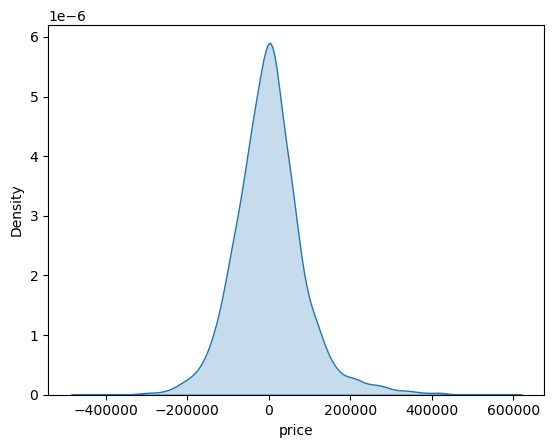

In [47]:
sns.kdeplot(x=residuals['price'], fill=True);

# Hata (residual) dağılımını görselleştiriyoruz.
# 'sns.kdeplot' hata değerlerinin yoğunluk grafiğini çizer.
# fill=True, grafiğin altını renkle doldurur (daha net görünüm için).

In [48]:
from yellowbrick.regressor import ResidualsPlot

In [49]:
# Yellowbrick kütüphanesinden ResidualsPlot sınıfını içe aktarıyoruz.
# Bu sınıf, regresyon modelinin hata dağılımını daha detaylı analiz etmeyi sağlar.

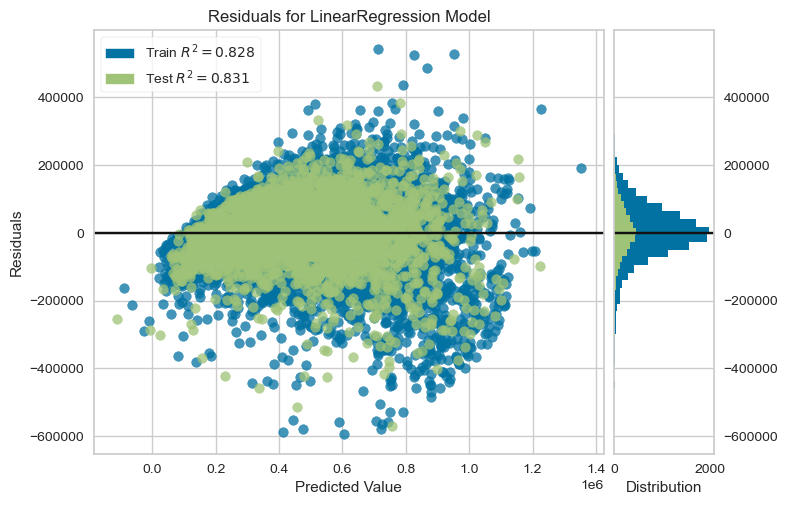

In [50]:
vis=ResidualsPlot(lr) # Lineer regresyon (lr) modeli için bir residuals plot objesi oluşturuyoruz.
vis.fit(x_train,y_train) # Modeli eğitim verisiyle eğitiyoruz.
vis.score(x_test,y_test) # Test verisiyle modeli değerlendiriyoruz (artık görsel olarak hataları inceleyebiliriz).
vis.show() # ResidualsPlot grafiğini ekrana çizdiriyoruz.
plt.show() # Matplotlib grafiğini de gösteriyoruz (ek görselleştirme desteği için).

_Bu projede King County ev fiyatlarını tahmin eden bir model geliştirdik._ <br>
_Hedefimiz olan r2 yi 0.85 ve RMSE 81881 olarak bulduk._ <br>
_En iyi model XGBRegressor olark belirlendi. Hedefimizi tutturduk_